In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
print(tf.__version__)

2.2.0


In [40]:
mnist=keras.datasets.fashion_mnist

In [41]:
type(mnist)

module

In [42]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
y_train.shape

(60000,)

In [45]:
np.max(x_train)

255

In [46]:
np.mean(x_train)

72.94035223214286

In [47]:
x_test.shape

(10000, 28, 28)

In [48]:
y_test.shape

(10000,)

In [49]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [50]:
class_names=['top','trouse','pullover','dress','coat','shirt','sneaker','bag','ankle_boot']

In [51]:
####Data Exploration

In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
y_train.shape

(60000,)

In [54]:
print('x_train.shape=',x_train.shape)
print('y_train.shape=',y_train.shape)
print('x_test.shape=',x_test.shape)
print('y_test.shape=',y_test.shape)

x_train.shape= (60000, 28, 28)
y_train.shape= (60000,)
x_test.shape= (10000, 28, 28)
y_test.shape= (10000,)


In [55]:
x_test.shape

(10000, 28, 28)

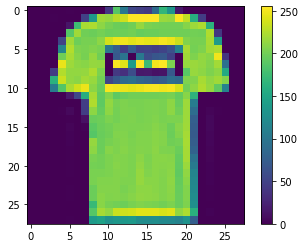

In [57]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

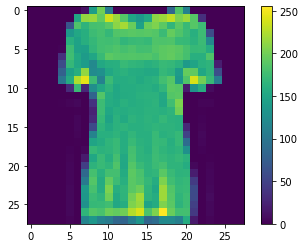

In [58]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()

In [59]:
x_train=x_train/255.0

In [60]:
x_test=x_test/255.0

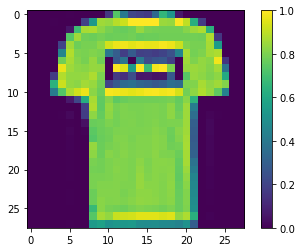

In [61]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [62]:
####build the model with tf-2.0

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [64]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))

In [76]:
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 28)                21980     
_________________________________________________________________
dense_2 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_3 (Dense)              (None, 28)                812       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                290       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1

In [78]:
####model compilation####

In [79]:
####loss function,optimizer,metrics

In [80]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [81]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3786 - accuracy: 0.8848
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3100 - accuracy: 0.8908
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2990 - accuracy: 0.8939
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2927 - accuracy: 0.8946
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2872 - accuracy: 0.8961
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2824 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2763 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9003
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.9008
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.265

In [82]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3830 - accuracy: 0.8689


In [83]:
print(test_acc)

0.8689000010490417


In [85]:
from sklearn.metrics import accuracy_score

In [86]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [89]:
accuracy_score(y_test,y_pred)

0.8689

In [90]:
pred=model.predict(x_test)

In [91]:
pred

array([[2.22020390e-05, 9.70582505e-07, 4.53981238e-06, ...,
        1.06989185e-03, 6.34284197e-06, 9.98566568e-01],
       [4.19501943e-04, 6.14809323e-06, 9.89970386e-01, ...,
        6.42244459e-07, 6.70922745e-05, 3.19890410e-06],
       [1.37148845e-05, 9.99706566e-01, 9.07663798e-06, ...,
        9.09330211e-09, 3.66467793e-06, 3.79777703e-07],
       ...,
       [1.28443251e-04, 1.57086163e-06, 4.59364082e-06, ...,
        3.68293477e-05, 9.99555290e-01, 2.61615842e-05],
       [1.46799612e-05, 9.99693155e-01, 9.58227793e-06, ...,
        1.00856035e-08, 3.94670087e-06, 4.11720293e-07],
       [1.69578307e-05, 1.15814032e-06, 4.15983266e-07, ...,
        4.15216782e-04, 1.90699120e-05, 5.02468611e-04]], dtype=float32)

In [92]:
pred[0]

array([2.2202039e-05, 9.7058251e-07, 4.5398124e-06, 1.7646726e-06,
       1.3450122e-05, 2.9924914e-04, 1.5000790e-05, 1.0698918e-03,
       6.3428420e-06, 9.9856657e-01], dtype=float32)

In [93]:
np.argmax(pred[0])

9